In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-countries-by-sugarcane-production/List of Countries by Sugarcane Production.csv


**Introduction**
=

**Disclaimer: Any Visuals Related to Production Per Person are flawed (the code will be commented). I am still yet to figure out how to clean that column, so you may ignore that code if you'd like (I'd greatly appreicate if I can recieve some guidance on how to clean that column), thanks!**

In [2]:
df=pd.read_csv('/kaggle/input/list-of-countries-by-sugarcane-production/List of Countries by Sugarcane Production.csv',dtype={'Production (Tons)': str})
# dfAfrica = df[df['Continent'] == 'Africa']
# dfAsia=df[df['Continent']=='Asia']
# dfSA=df[df['Continent']=='South America']
# dfNA=df[df['Continent']=='North America']
# dfOceania=df[df['Continent']=='Oceania']

df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             0
Yield (Kg / Hectare)          0
dtype: int64

In [5]:
df['Production (Tons)'] = df['Production (Tons)'].astype(str).str.replace('.', '').astype(int)



df['Acreage (Hectare)'] = df['Acreage (Hectare)'].fillna('0').astype(str).str.replace('.', '').astype(float)

df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].astype(str).str.split('.').str[0]
df['Yield (Kg / Hectare)'] = pd.to_numeric(df['Yield (Kg / Hectare)'], errors='coerce')

In [6]:
df['Yield (Kg / Hectare)']

0      75
1      70
2      73
3      65
4      57
       ..
97     43
98     28
100    25
101    11
102    83
Name: Yield (Kg / Hectare), Length: 102, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


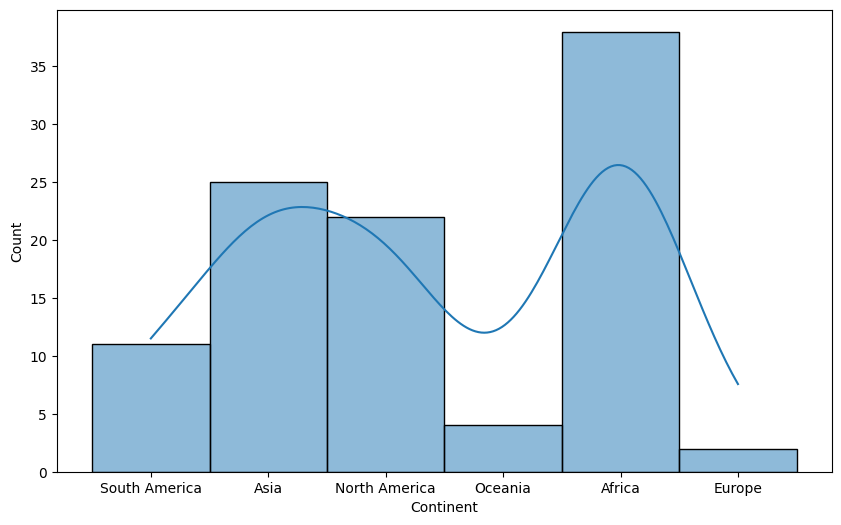

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Continent", kde=True)
plt.show()

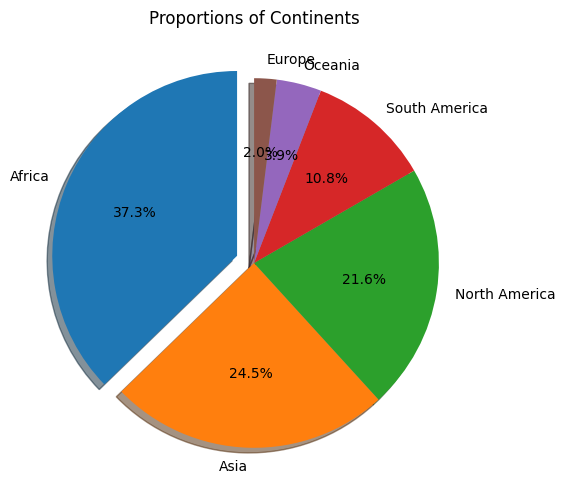

In [8]:
dfcontype=df['Continent']

count=dfcontype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Continents')
plt.show()

**Part 1A: Continent Analyzation for Sugarcane Production**
=

----

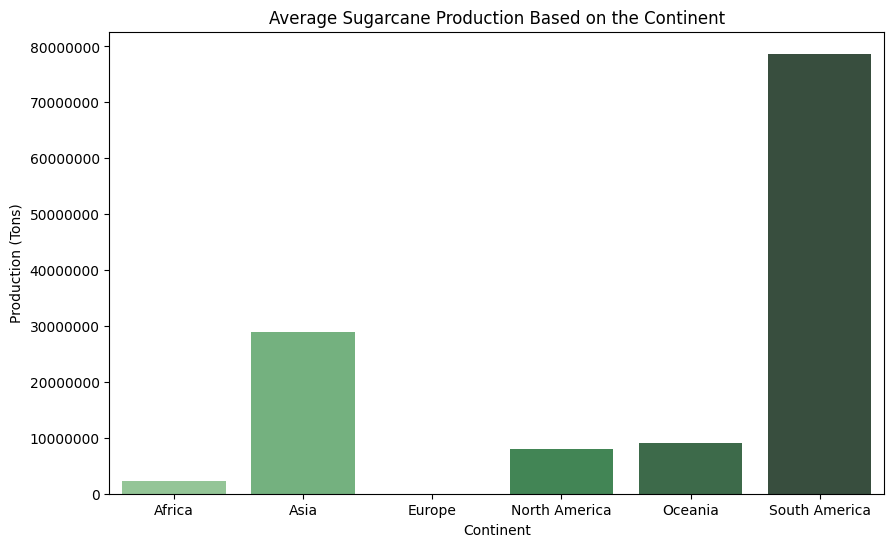

In [9]:
prodcon = df.groupby('Continent')['Production (Tons)'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Continent', y='Production (Tons)', data=prodcon,palette='Greens_d')
plt.title('Average Sugarcane Production Based on the Continent')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Continent')
plt.ylabel('Production (Tons)')
plt.show()

Now let's represent with a bar plot...

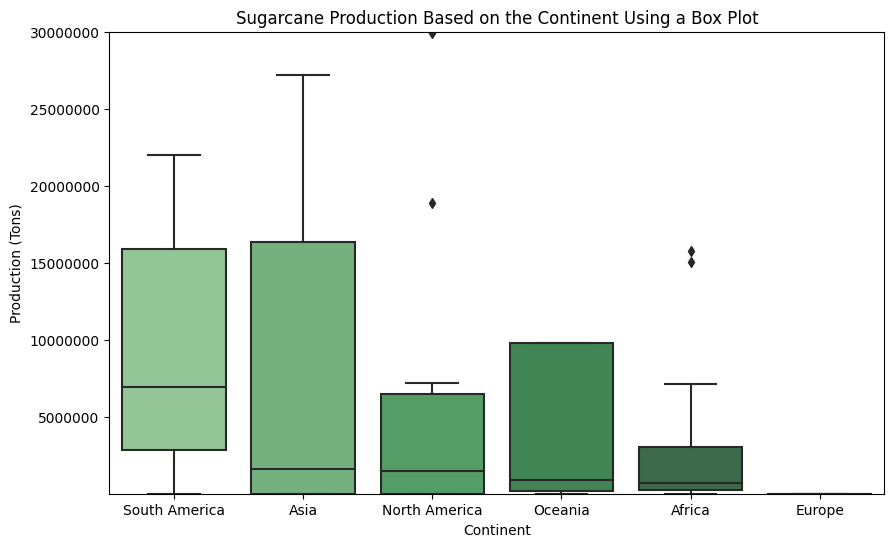

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Continent', y='Production (Tons)', data=df,palette='Greens_d')
plt.title('Sugarcane Production Based on the Continent Using a Box Plot')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Continent')
plt.ylabel('Production (Tons)')
plt.ylim(1,30000000)
plt.show()

In [11]:
# df['Production per Person (Kg)'] = pd.to_numeric(df['Production per Person (Kg)'], errors='coerce')
# prodperpersoncon = df.groupby('Continent')['Production per Person (Kg)'].mean().reset_index()

# plt.figure(figsize=(10,6))
# sns.barplot(x='Continent', y='Production per Person (Kg)', data=prodperpersoncon ,palette='Greens_d')
# plt.title('Average Sugarcane Production Per Person Based on the Continent (Flawed)')
# plt.xlabel('Continent')
# plt.ylabel('Production Per Person')
# plt.show()

In [12]:
# plt.figure(figsize=(10,6))
# sns.boxplot(x='Continent', y='Production per Person (Kg)', data=df ,palette='Greens_d')
# plt.title('Sugarcane Production Per Person Based on the Continent Using a Box Plot (Flawed)')
# plt.xlabel('Continent')
# plt.ticklabel_format(style='plain', axis='y')
# plt.ylim(1,1000000)
# plt.ylabel('Production Per Person')
# plt.show()

**Part 1B: Analyzation for Sugarcane Efficiency**
=

----

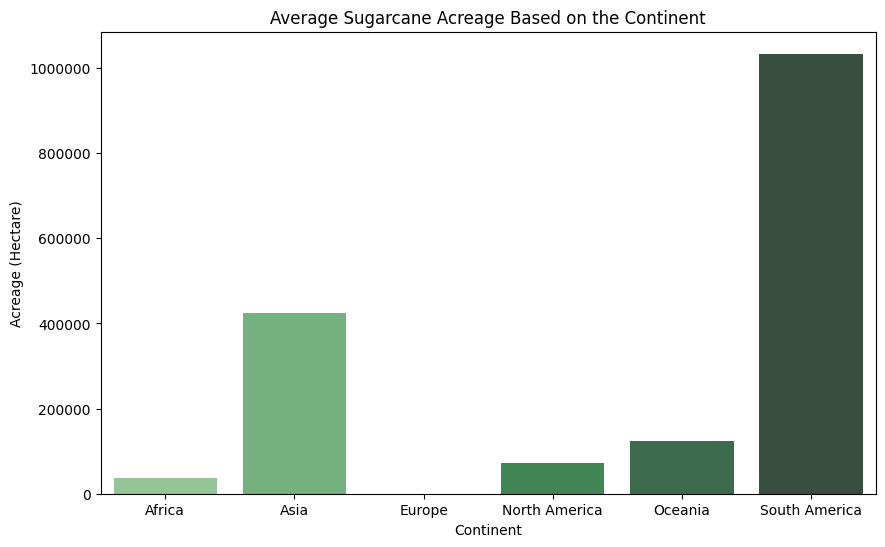

In [13]:
conhec = df.groupby('Continent')['Acreage (Hectare)'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Continent', y='Acreage (Hectare)', data=conhec,palette='Greens_d')
plt.title('Average Sugarcane Acreage Based on the Continent')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Continent')
plt.ylabel('Acreage (Hectare)')
plt.show()

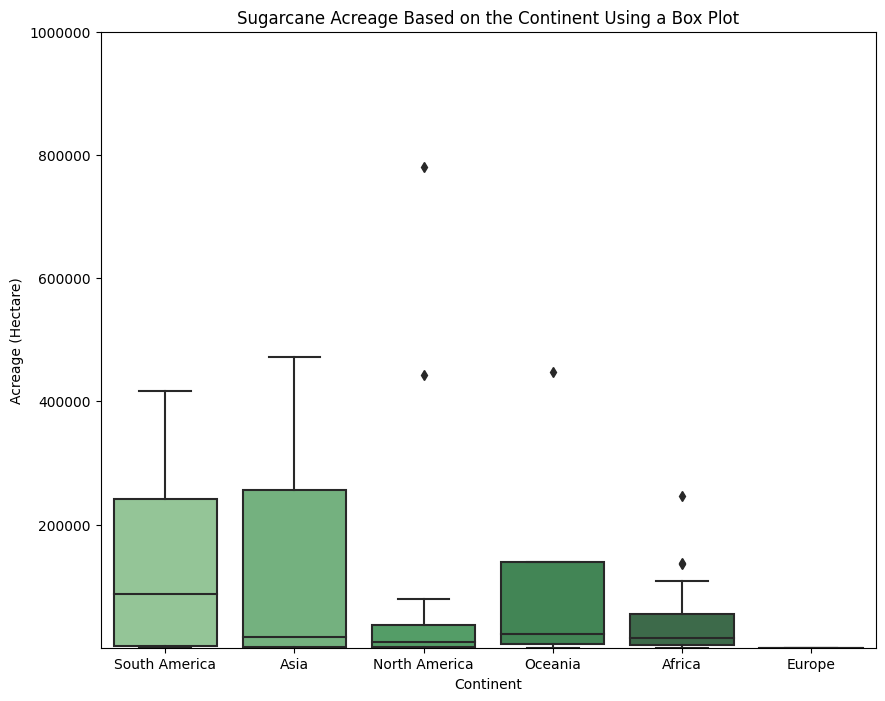

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Continent', y='Acreage (Hectare)', data=df,palette='Greens_d')
plt.title('Sugarcane Acreage Based on the Continent Using a Box Plot')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(1,1000000)
plt.xlabel('Continent')
plt.ylabel('Acreage (Hectare)')
plt.show()

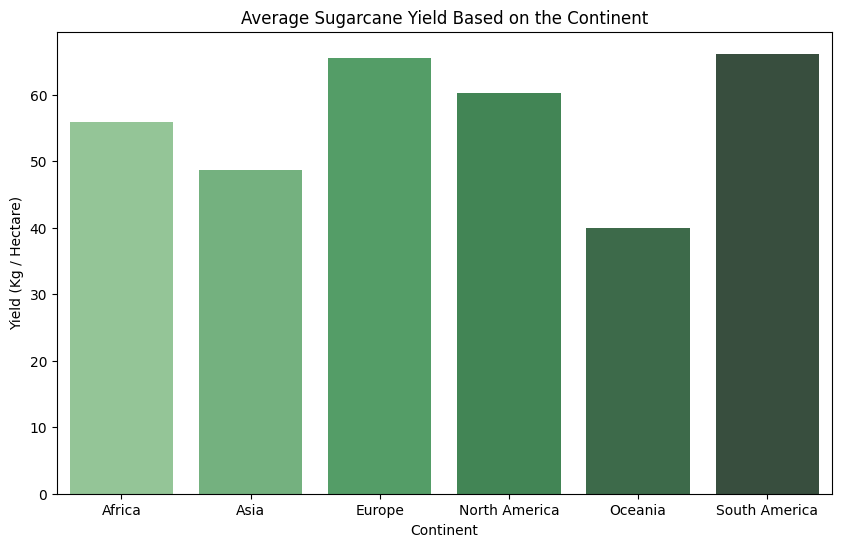

In [15]:
conheceff = df.groupby('Continent')['Yield (Kg / Hectare)'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Continent', y='Yield (Kg / Hectare)', data=conheceff,palette='Greens_d')
plt.title('Average Sugarcane Yield Based on the Continent')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

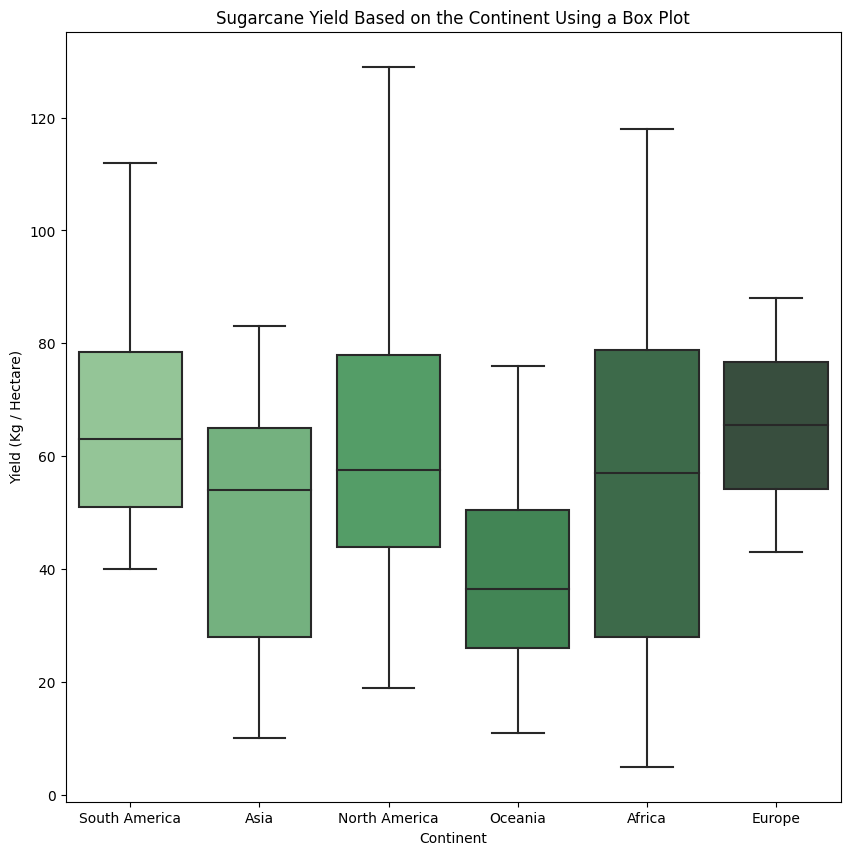

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Yield (Kg / Hectare)', data=df,palette='Greens_d')
plt.title('Sugarcane Yield Based on the Continent Using a Box Plot')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Conclusions from this part:**

-South America has the highest average sugarcane production but the range of sugarcane production per country is much wider in Asia compared to South America.

-South America also has the highest sugarcane acreage but Asia has a slightly wider range of sugarcane acreage for every country.

-Africa takes the highest average sugarcane yield out of all the continents 

---

**Part 2: Chloropleth Map Representation of Sugarcane Across the World**
=

In [17]:
caneprodmap = px.choropleth(df, 
                                locations='Country', 
                                locationmode='country names', 
                                color='Production (Tons)', 
                                color_continuous_scale='Oranges',
                                title='World Map: Sugarcane Production Across Countries')
caneprodmap.show()

In [18]:
caneprodpersonmap = px.choropleth(df, 
                                locations='Country', 
                                locationmode='country names', 
                                color='Acreage (Hectare)', 
                                color_continuous_scale='Oranges',
                                title='World Map: Sugarcane Acreage Across the World')
caneprodpersonmap.show()

In [19]:
caneprodpersonmap = px.choropleth(df, 
                                locations='Country', 
                                locationmode='country names', 
                                color='Yield (Kg / Hectare)', 
                                color_continuous_scale='Oranges',
                                title='World Map: Sugarcane Yield Across the World')
caneprodpersonmap.show()

In [20]:
# caneprodpersonmap = px.choropleth(df, 
#                                 locations='Country', 
#                                 locationmode='country names', 
#                                 color='Production per Person (Kg)', 
#                                 color_continuous_scale='Oranges',
#                                 title='World Map: Sugarcane Production/Person Across Countries (Flawed)')
# caneprodpersonmap.show()

**Conclusions:**

-Sugarcane production is highly prevalent in Brazila and India.

-Brazil and India also have the highest sugarcane acreages.

-Peru, Egypt, and many sub-Saharan countries place high in sugarcane yield.

----

**Part 3A: Scatterplots Between Numerical Factors**
=

Note: On the x-axis, the 1e7 means that every value on the x-axis is multipled by 10^7 to get the actual value.
Same thing goes for the y-axis except the the value 1e8 or 10^8


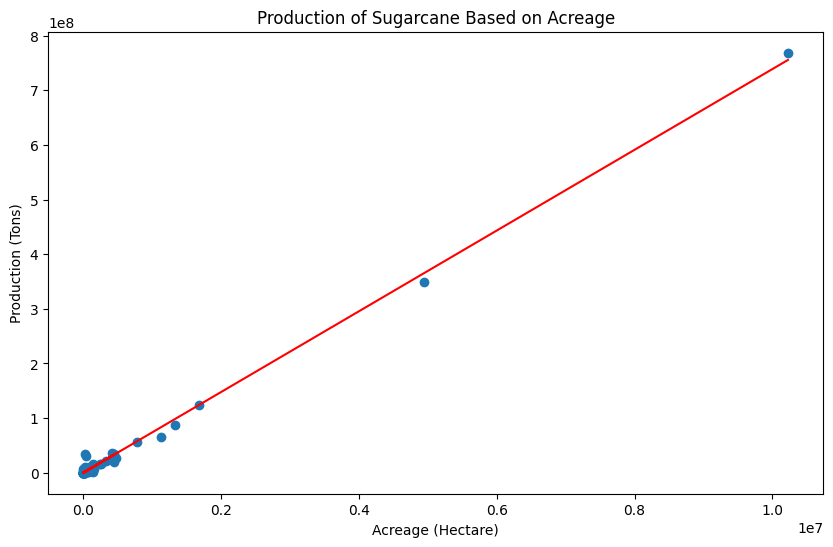

In [21]:
print('Note: On the x-axis, the 1e7 means that every value on the x-axis is multipled by 10^7 to get the actual value.')
print('Same thing goes for the y-axis except the the value 1e8 or 10^8')
plt.figure(figsize=(10,6))
plt.scatter(df['Acreage (Hectare)'],df['Production (Tons)'])
plt.title('Production of Sugarcane Based on Acreage')
plt.xlabel('Acreage (Hectare)')
plt.ylabel('Production (Tons)')
z = np.polyfit(df['Acreage (Hectare)'], df['Production (Tons)'], 1)
p = np.poly1d(z)

plt.plot(df['Acreage (Hectare)'], p(df['Acreage (Hectare)']), color='red', label="Trend line")
plt.show()



plt.show()

Note: On the x-axis, the 1e7 means that every value on the x-axis is multipled by 10^7 to get the actual value.
Same thing goes for the y-axis except the the value 1e8 or 10^8


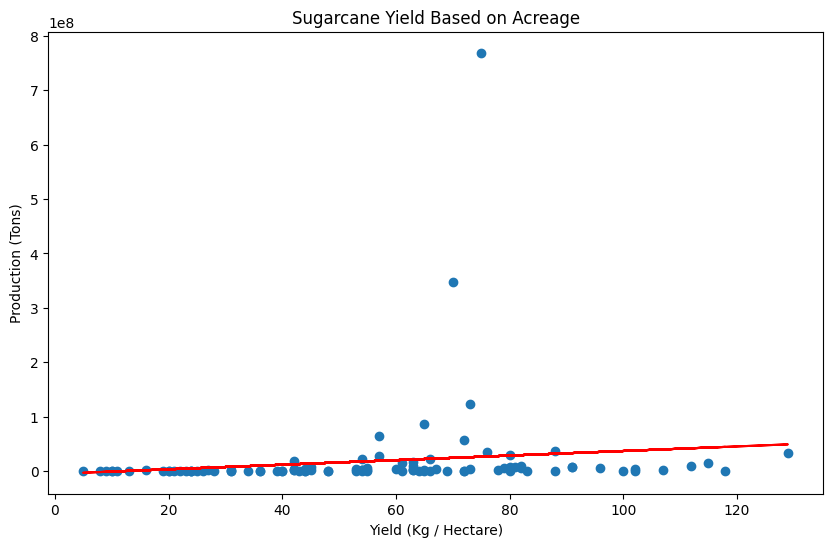

In [22]:
print('Note: On the x-axis, the 1e7 means that every value on the x-axis is multipled by 10^7 to get the actual value.')
print('Same thing goes for the y-axis except the the value 1e8 or 10^8')
plt.figure(figsize=(10,6))
plt.scatter(df['Yield (Kg / Hectare)'],df['Production (Tons)'])
plt.title('Sugarcane Yield Based on Acreage')
plt.xlabel('Yield (Kg / Hectare)')
plt.ylabel('Production (Tons)')
z = np.polyfit(df['Yield (Kg / Hectare)'], df['Production (Tons)'], 1)
p = np.poly1d(z)

plt.plot(df['Yield (Kg / Hectare)'], p(df['Yield (Kg / Hectare)']), color='red', label="Trend line")
plt.show()



plt.show()

**Conclusions:**

-There is an extremely strong positive correlation between acreage and sugarcane production, but not a strong correlation between yield and production (I will check the relationship between acreage and yield in a heatmap later).

---

**Part 3B: Analysis by Comparison of Countries**
=

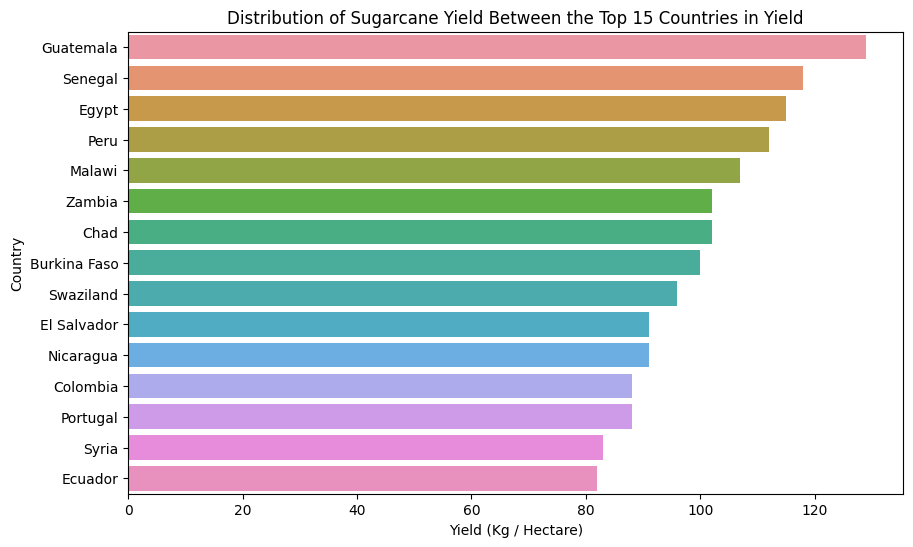

In [23]:
top15conbyyield = df.nlargest(15, 'Yield (Kg / Hectare)')
top15conbyyield = top15conbyyield[['Country', 'Yield (Kg / Hectare)']]

plt.figure(figsize=(10,6))
sns.barplot(y='Country',x='Yield (Kg / Hectare)',data=top15conbyyield,orient='h')
plt.title('Distribution of Sugarcane Yield Between the Top 15 Countries in Yield')
plt.show()

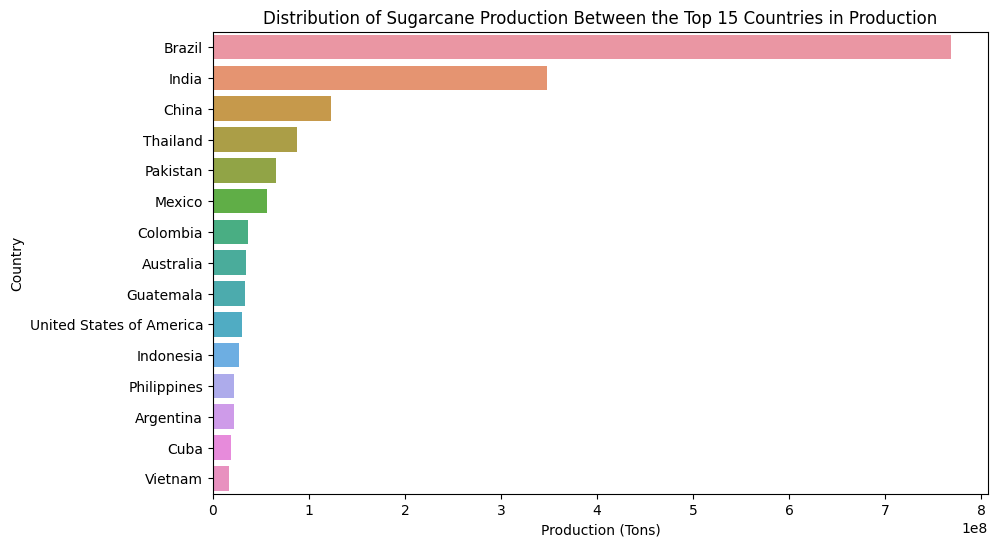

In [24]:
top15conbyprod = df.nlargest(15, 'Production (Tons)')
top15conbyprod = top15conbyprod[['Country', 'Production (Tons)']]

plt.figure(figsize=(10,6))
sns.barplot(y='Country',x='Production (Tons)',data=top15conbyprod,orient='h')
plt.title('Distribution of Sugarcane Production Between the Top 15 Countries in Production')
plt.show()

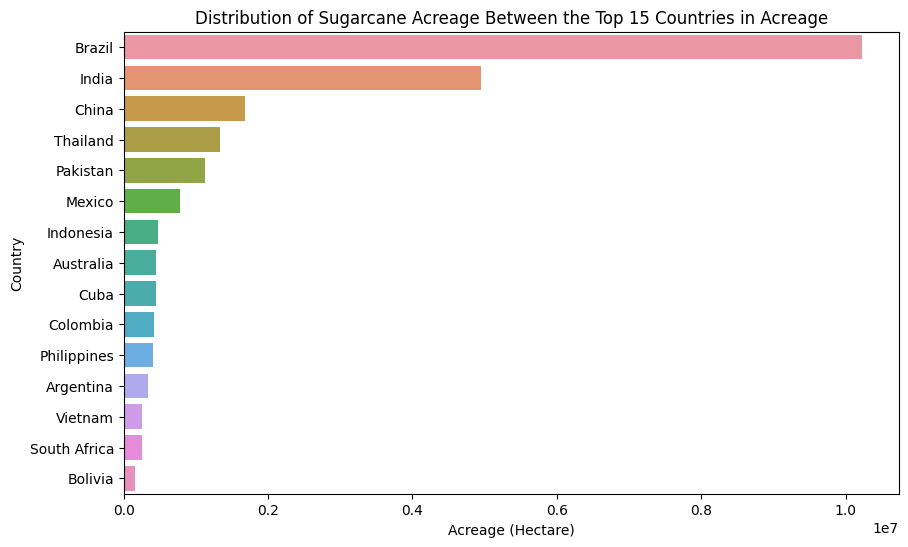

In [25]:
top15conbyac = df.nlargest(15, 'Acreage (Hectare)')
top15conbyac = top15conbyac[['Country', 'Acreage (Hectare)']]

plt.figure(figsize=(10,6))
sns.barplot(y='Country',x='Acreage (Hectare)',data=top15conbyac,orient='h')
plt.title('Distribution of Sugarcane Acreage Between the Top 15 Countries in Acreage')
plt.show()

**Conclusions:**

-Guatemala, Senegal, Egypt, Peru, and Malawi place in the countries with the highest sugarcane yield, followed by many sub-Saharan countries.

-Brazil and India lead the highest sugarcane production, followed by an equal share of Asian and Central/South American countries.

-Brazil and India also have the highest sugarcane acreages, followed by an equal share of Asian countries, Central/South American countries. Australia also seems to have the highest acreage in Oceania, Brazil's acreage is almost twenty times that acreage.

---

**Part 4: Heatmap**
=

<Axes: title={'center': 'Correlation Map'}>

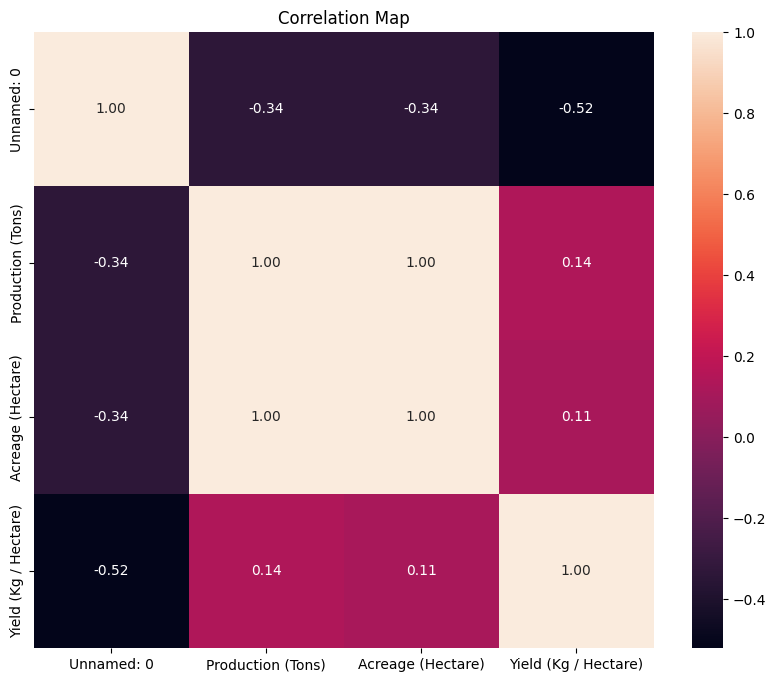

In [26]:
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(number.corr(),annot=True, fmt='.2f')

Every correlation seems to be weak except for the relation between Acreage and Production, which is at a strong number of 1.

---

**Key Takeaways**
=

-South America is a leader in sugarcane production and land but Africa has the highest yield.

-In country scale, Brazil and India lead in terms of production and acreage but Peru, Egypt, and other sub-Saharan countries place high in sugarcane yield.

-There is an extremely storng positive correlation between acreage and production as shown by a scatterplot and a heat map.


-To emphasize on yield, Guatemala, Senegal, Egypt, Peru, and Malawi place in the countries with the highest sugarcane yield, followed by many sub-Saharan countries.

-To emphasize on production, Brazil and India lead the highest sugarcane production, followed by an equal share of Asian and Central/South American countries. Australia is also up there alongside the other countries.

---

**Thank You!**
=

I thank you for exploring my notebook! I would also greatly appreicate an upvote if you liked this project. I would also love for you to check out my projects and upvote as I've only recently started on Kaggle. I'm always eager to learn.

**On another note**, I struggled trying to clean the column of production per person, so any help would be greatly appreciated so I can expand this analysis, thanks!

Until next time!
